# BEFORE RUNNING ANYTHING PLEASE ACTIVATE THE VENV OR ELSE
# RUN THE FOLLOWING LINE IN THE TERMINAL

.venv\Scripts\activate

## The next line should be the following:

(.venv) (base) PS D:\Projects\ALGOTHON 2024> 

In [3]:
# Find leaders and laggards
# Find what stocks move together
# The relationship between stocks should be static, i.e. should not change over time
# When stock move, usually the percentage change is mentioned, so the algorithm should be able to handle different orders of magnitude
# A model should be as simple as possible, but no simpler than that
# Not too many parameters


In [4]:
# Problem statement
# Trading strategy to trade a universe of 50 stocks over a number of days
# Every day, there's one price update for each stock, after the update 
# you can buy/sell at that price
# Position can be negative (short selling) or positive (long position)
# Dollar position (price * number of shares) should be less than 10000
# Commission: 0.001 per dollar traded
# Scored using utility function mean(pl) - 0.1 * stddev(pl)
# pl = sum(price_change * position)

# Implement a function called getMyPosition(prcSoFar)
# prcSoFar is a 50xN matrix of stock prices so far
# Return a 50x1 vector of position
# Saved in python file teamName.py

# Evaluated on 1250 days of data
# first 500 days available at the beginning

# eval.py is used to evaluate the function

# General advice:
# Be nimble, don't get anchored on one idea
# Creative, dont overcomplicate
# Focus on thought process
# Have fun and learn


# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Import/format data

In [2]:
# data = pd.read_csv("prices.txt", header=None, delimiter="  ")
# data.to_csv("prices0to500.csv", index=False)
data = pd.read_csv("prices0to500.csv", header=None)
data.drop(0, axis="rows", inplace=True)

In [3]:
data_pct = data.pct_change()
# data_pct.drop([0, 1], axis=1, inplace=True)
data_pct.dropna(inplace=True)
data_pct = data_pct*100

In [4]:
print("dim of data_pct:", data_pct.shape)
print("dim of data:", data.shape)

dim of data_pct: (499, 50)
dim of data: (500, 50)


In [5]:
data_pct.head()

0         1         2         3         4         5         6   \
2  0.148588  0.628053  0.123813 -0.039588 -0.076775 -0.384615 -0.158061   
3 -0.074184  0.346741 -0.082440  0.237624 -0.499424 -1.235521  0.158311   
4  0.445434  0.221147 -0.123762  0.256815 -0.270270 -1.016419 -0.105374   
5  0.813008 -0.717142 -0.041305 -0.197044  0.600077 -0.315956 -0.369198   
6 -0.146628  0.500069  0.020661 -0.256663 -0.076967 -0.792393  0.211752   

         7         8         9   ...        40        41        42        43  \
2  0.272480  0.345373 -0.060048  ... -0.367647  0.376614 -0.138313  1.476077   
3  0.292642 -0.186433 -1.201682  ... -0.123001  0.661068  0.415512 -1.287410   
4  1.583993 -0.086207  0.689236  ...  0.338670 -0.035499 -0.689655 -0.525068   
5  0.287238  0.201323 -0.422790  ...  0.153421  0.000000 -0.277778  0.476758   
6 -0.777414  0.186567  0.141529  ... -0.337010 -0.781250 -0.766017 -0.593120   

         44        45        46        47        48        49  
2 -0.190684 -0.076017 -0.263531  0.138045 -0.326531 -0.017828  
3  0.682314 -0.171168  0.569106  0.330852 -0.573301 -0.320970  
4  0.135538 -0.171461 -0.121261  0.054960  0.906096  0.429338  
5  0.243638  0.076336  0.748685  0.027465 -1.755102 -0.427503  
6  0.486092 -0.076278  0.943965 -0.137287  0.186955 -1.144902  

[5 rows x 50 columns]

In [6]:
data.head()

0      1      2      3      4      5      6      7      8      9   ...  \
1  13.46  71.65  48.46  50.52  52.10  13.00  18.98  47.71  69.49  49.96  ...   
2  13.48  72.10  48.52  50.50  52.06  12.95  18.95  47.84  69.73  49.93  ...   
3  13.47  72.35  48.48  50.62  51.80  12.79  18.98  47.98  69.60  49.33  ...   
4  13.53  72.51  48.42  50.75  51.66  12.66  18.96  48.74  69.54  49.67  ...   
5  13.64  71.99  48.40  50.65  51.97  12.62  18.89  48.88  69.68  49.46  ...   

      40     41     42     43     44     45     46     47     48     49  
1  32.64  55.76  14.46  58.94  36.71  52.62  49.33  36.22  49.00  56.09  
2  32.52  55.97  14.44  59.81  36.64  52.58  49.20  36.27  48.84  56.08  
3  32.48  56.34  14.50  59.04  36.89  52.49  49.48  36.39  48.56  55.90  
4  32.59  56.32  14.40  58.73  36.94  52.40  49.42  36.41  49.00  56.14  
5  32.64  56.32  14.36  59.01  37.03  52.44  49.79  36.42  48.14  55.90  

[5 rows x 50 columns]

<Axes: >

<Figure size 2000x1000 with 0 Axes>

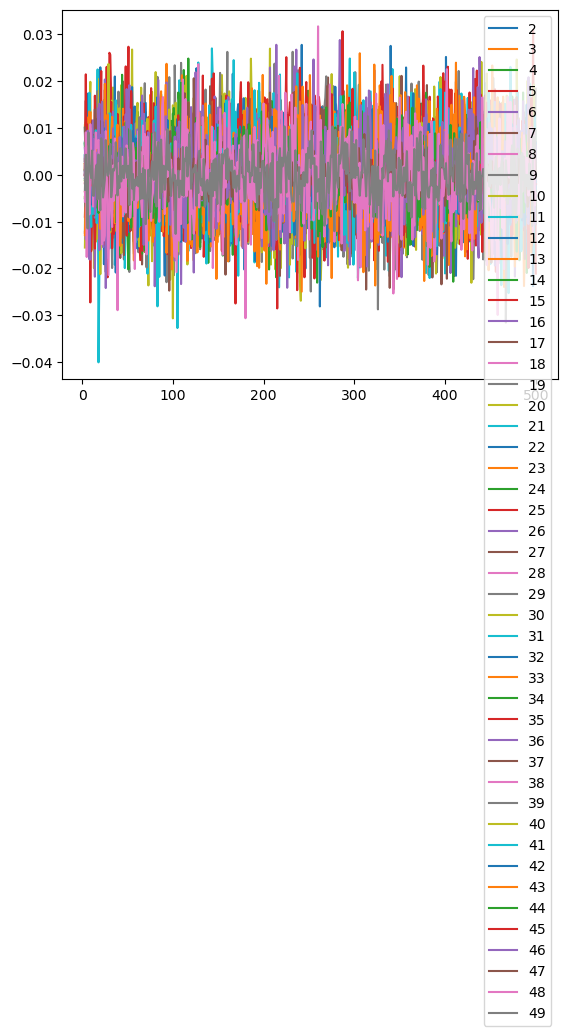

In [11]:
plt.figure(figsize=(20,10))
data_pct[1:].plot()

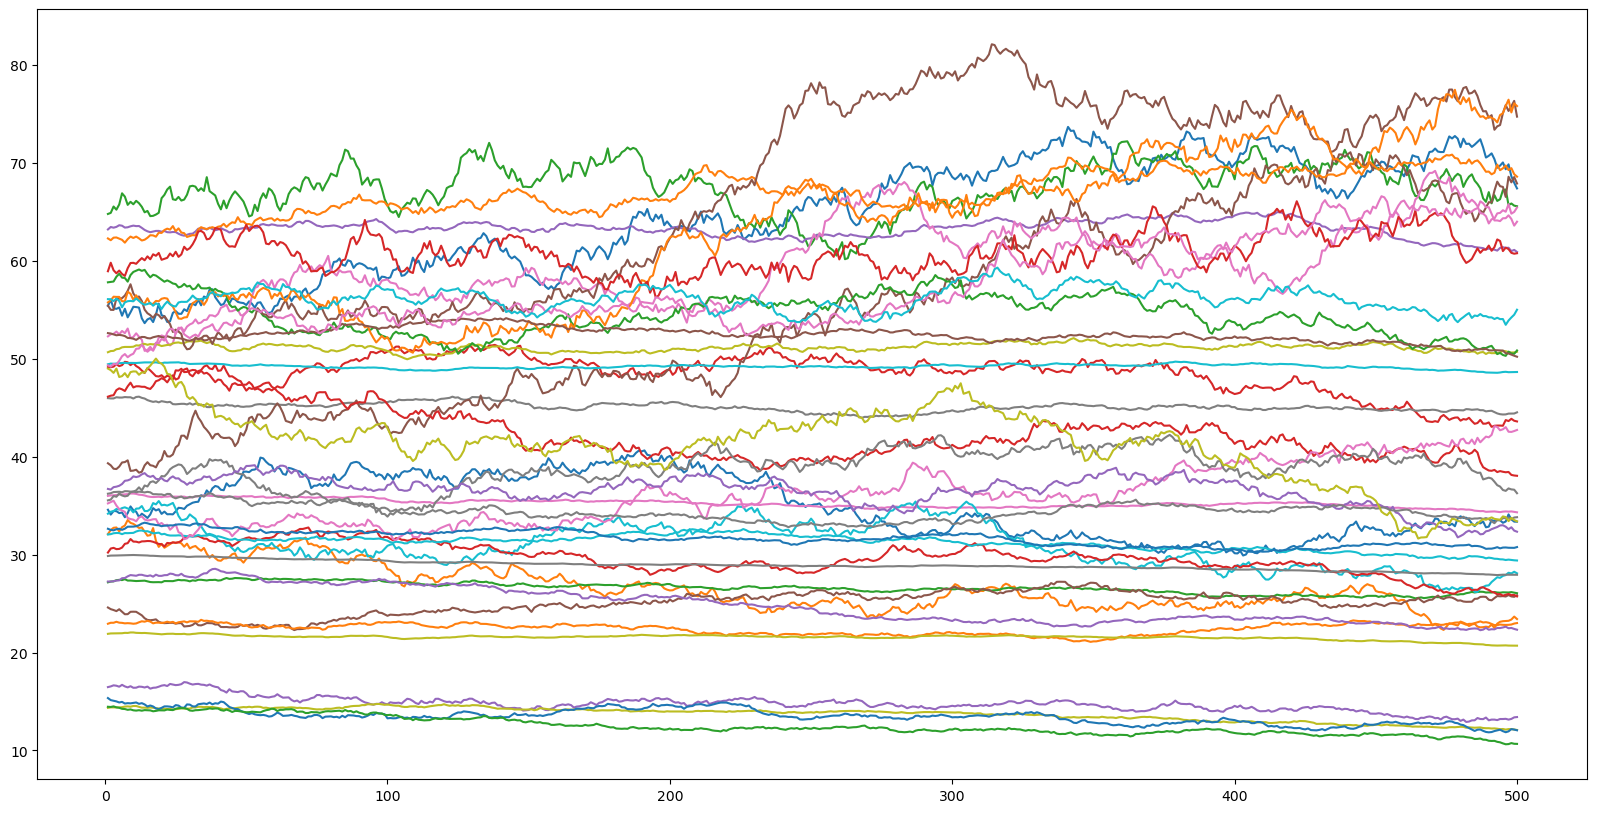

In [8]:
stock_start = 10   # Modify to view different stocks
stock_end = 50    # Modify to view different stocks
def plot_stocks_in_range(stock_start, stock_end, l_data = data):
    plt.figure(figsize=(20,10))
    for i in range(stock_start, stock_end):
        plt.plot(l_data[i])
    plt.show()
plot_stocks_in_range(stock_start, stock_end)

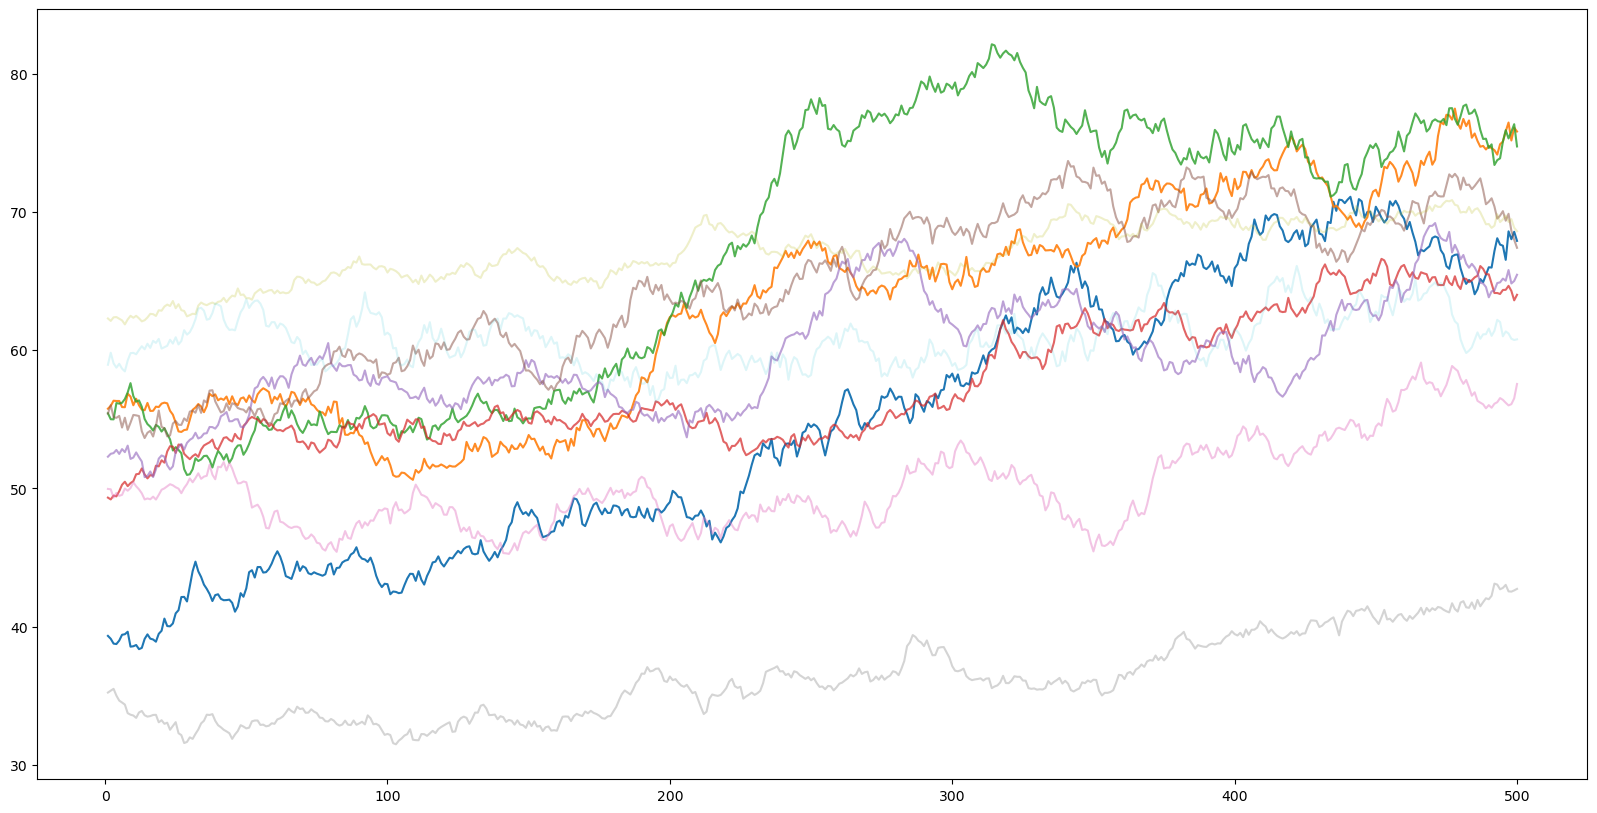

In [7]:
stock_select = [25, 41, 35, 46, 26, 20, 9, 36, 31, 43] # modify to view specific stocks
# Turn this into a function:
def plot_these_stocks(stock_selection = [], l_data = data,):
    '''
    Plots a list of stocks, with data from data as default.
    Input:
        stock_selection: a list of stocks to plot
        l_data: the data to plot (optional)
    Output:
        plt plot
    '''
    plt.figure(figsize=(20,10))
    for i in stock_selection:
        # Printing all the stocks in question with alpha decreasing by the index of the stock.
        alpha_value = max(0.1, 1 - 0.95 * (stock_selection.index(i) / len(stock_selection)))
        plt.plot(l_data[i], alpha=alpha_value)
    plt.show()
plot_these_stocks(stock_select, data)

Largest differences are: [28.57, 20.05, 19.3, 14.67, 13.16, 11.99, 7.59, 7.5, 6.31, 1.84]
At stocks: [25, 41, 35, 46, 26, 20, 9, 36, 31, 43]


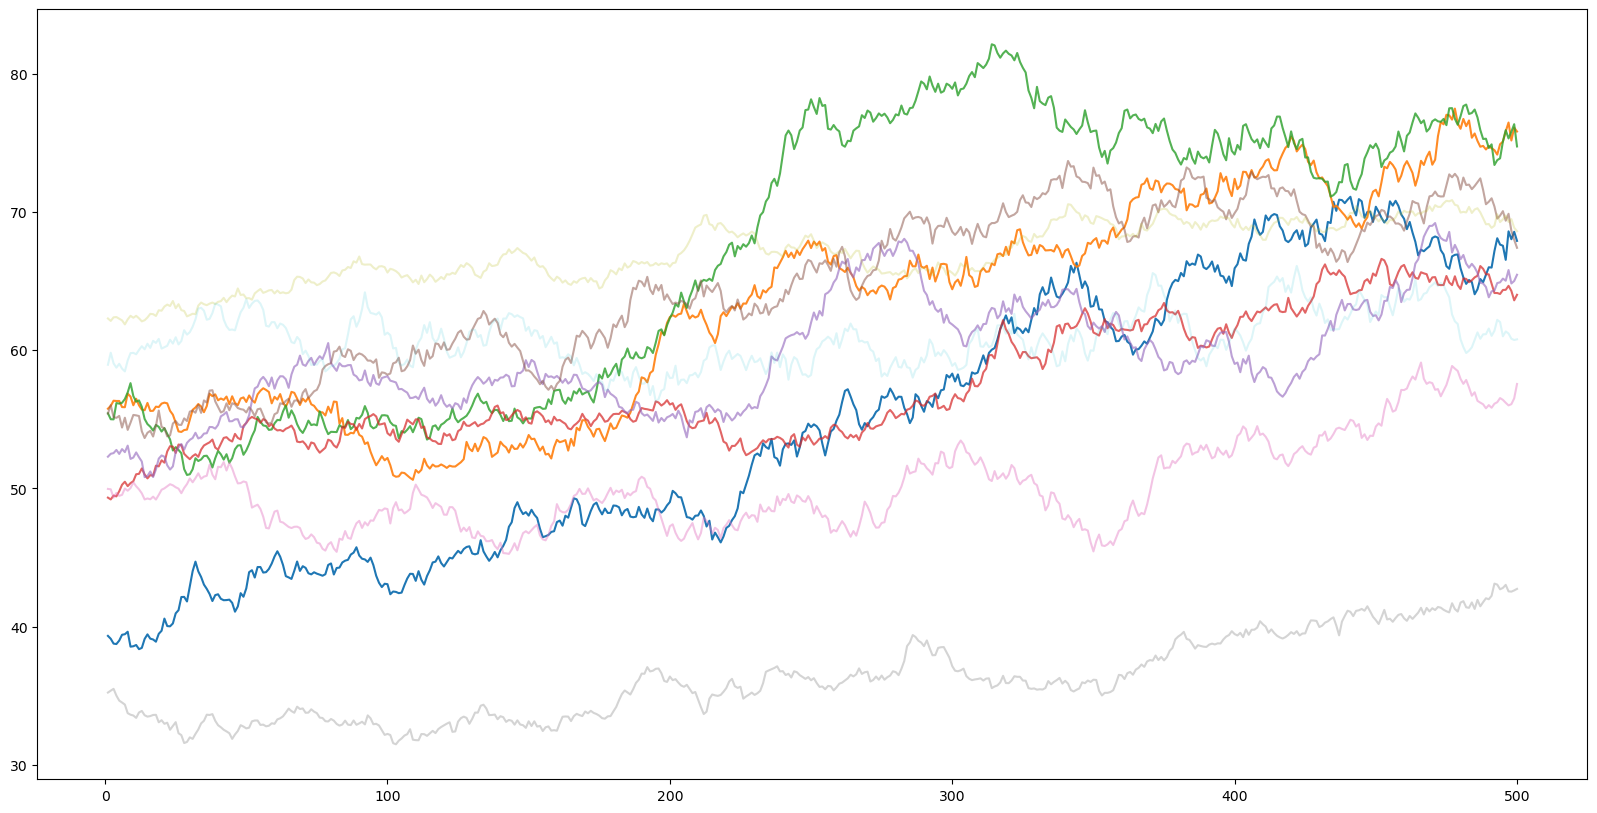

In [9]:
# Ranking the stocks based on the difference between the last and first price
diff = pd.DataFrame(data.iloc[-1] - data.iloc[0])
top = diff.sort_values(by=0, ascending=False, inplace=False).head(10)
bottom = diff.sort_values(by=0, ascending=True, inplace=False).head(10)
top_list, bottom_list = top.index.to_list(), bottom.index.to_list()
print("Largest differences are:",[round(i, 2) for i in top[0]])
print("At stocks:", top_list)
plot_these_stocks(top_list)
plot_these_stocks(bottom_list)

In [12]:
# Linear regression is out of the question
# We can try to find the correlation between the stocks

# Correlation matrix
corr_matrix = data_pct.corr()
plt.figure(figsize=(20,10))
plt.matshow(corr_matrix, fignum=1)
plt.colorbar()
plt.show()


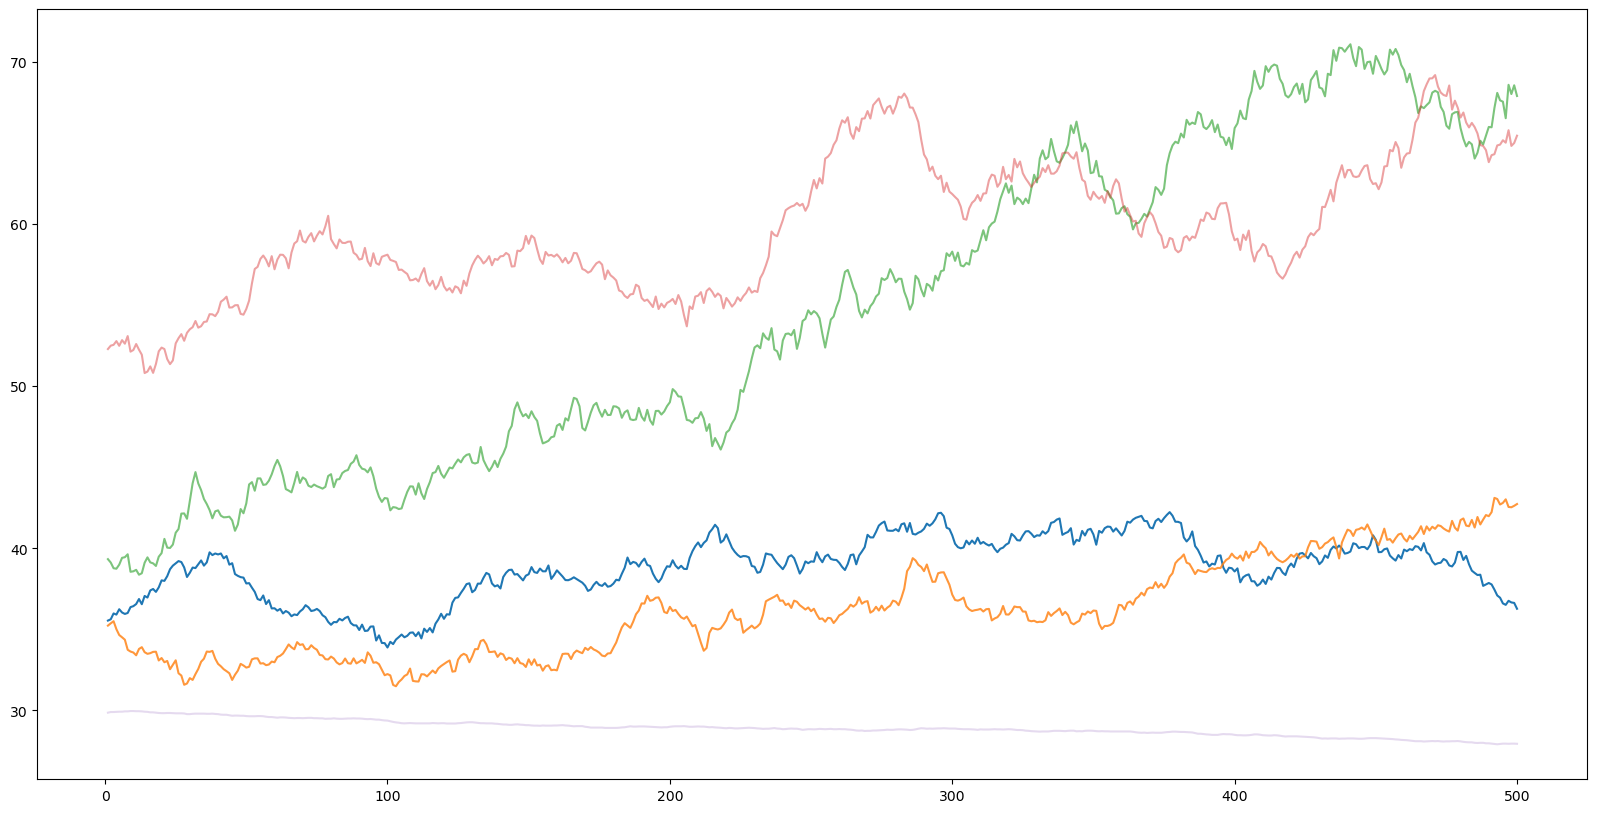

In [55]:
plot_these_stocks([37,36,25,26,27])

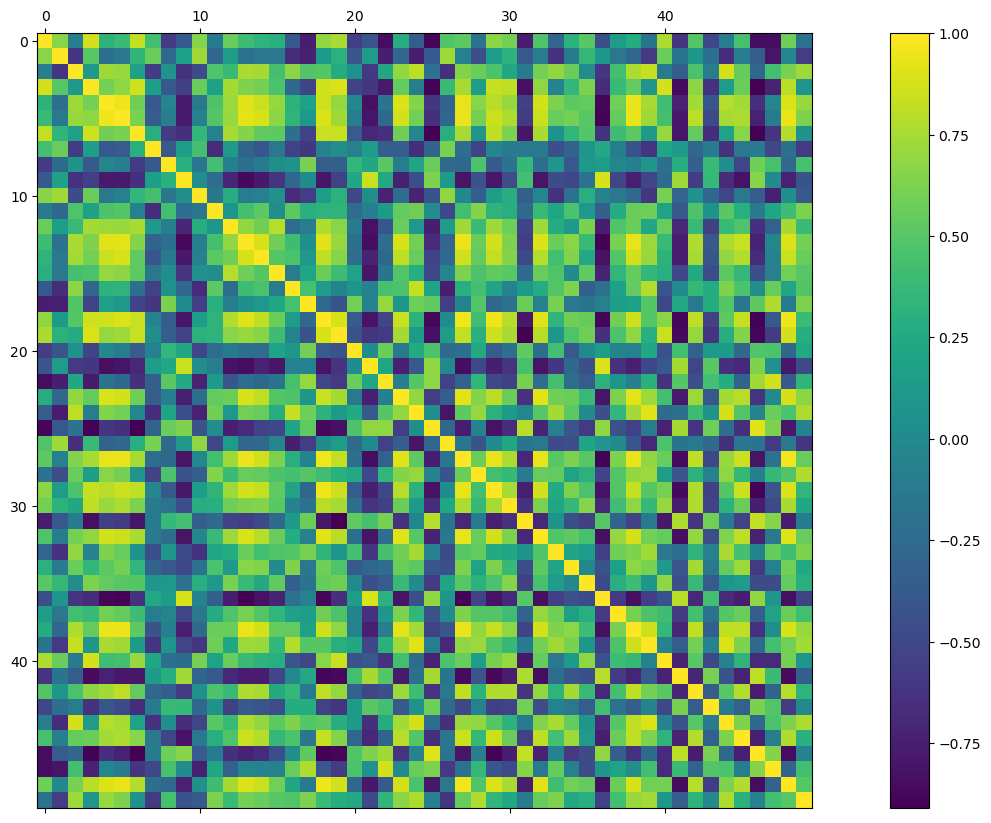

In [30]:
# Split the data into training and testing
train_data = data[:250]
test_data = data[250:]

# Test the correlation between the training and testing data
train_corr = train_data.corr()
test_corr = test_data.corr()
plt.figure(figsize=(20,10))
plt.matshow(test_corr, fignum=1)
plt.colorbar()
plt.show()



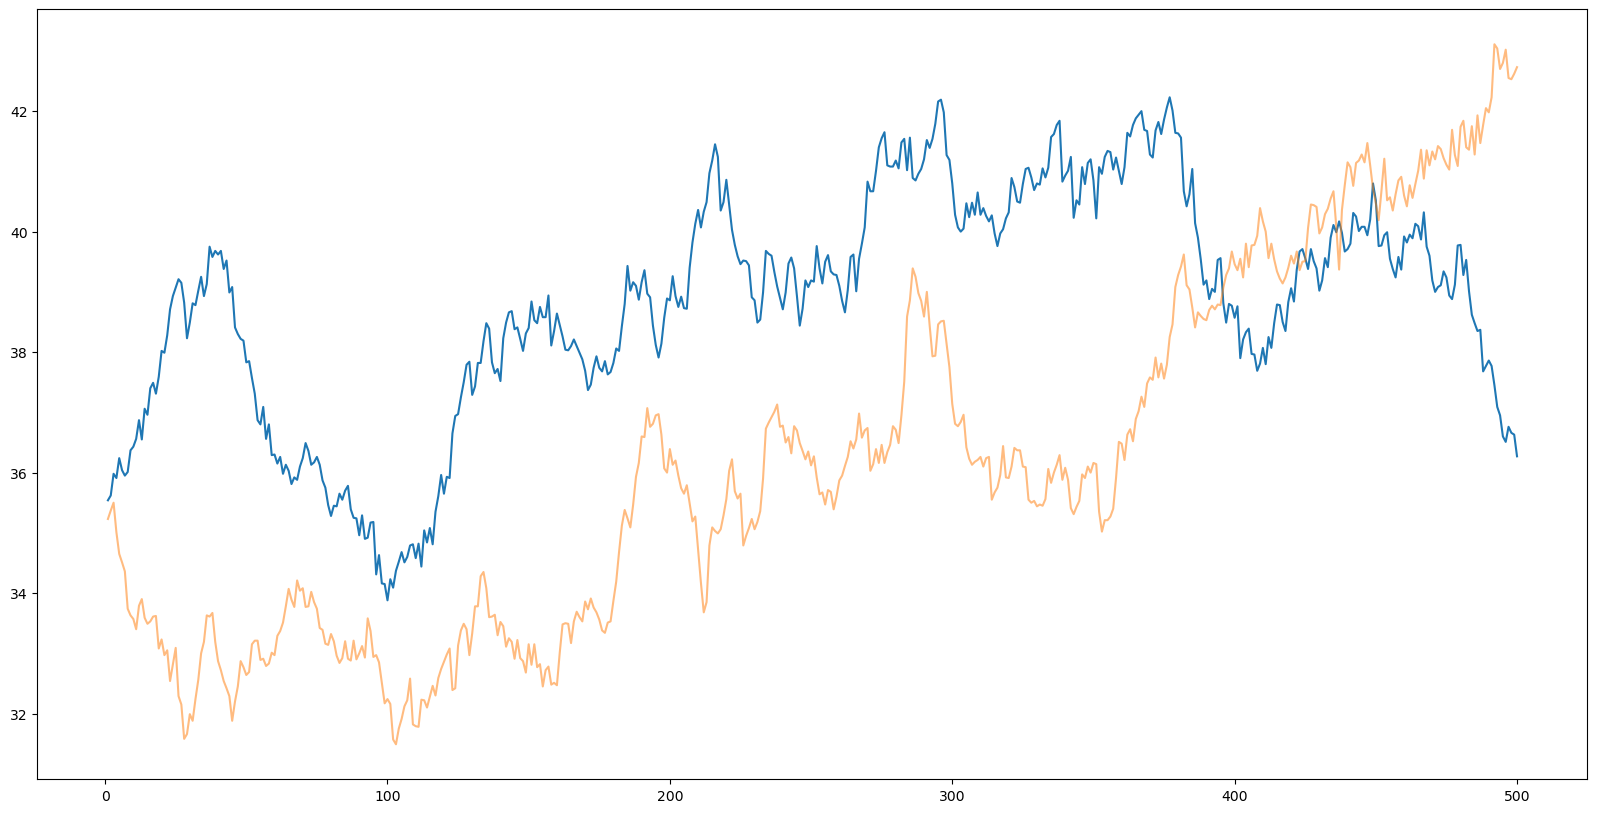

In [25]:
plot_these_stocks([37, 36])

In [47]:
data_pct = data_pct*100

# Section: Smoothing and finding peaks and valleys

In [50]:
data_pct[1].plot()

<Axes: >

In [10]:
# Copy data to experiment with
# Smoothing the data
data2 = data.copy()
data2 = data2.rolling(window=10).mean()
data2.bfill(inplace=True)


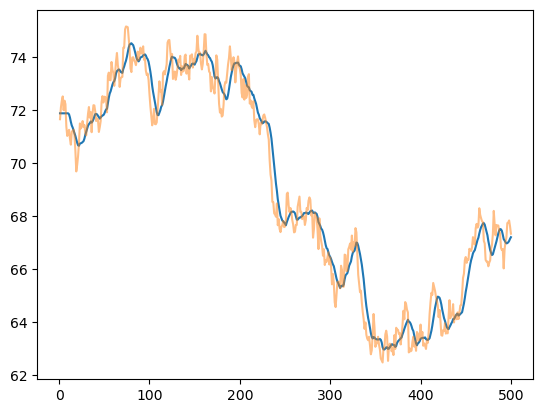

In [11]:
data2[1].plot()
data[1].plot(alpha=0.5)
plt.show()

# Testing prophet

22:14:37 - cmdstanpy - INFO - Chain [1] start processing
22:14:37 - cmdstanpy - INFO - Chain [1] done processing


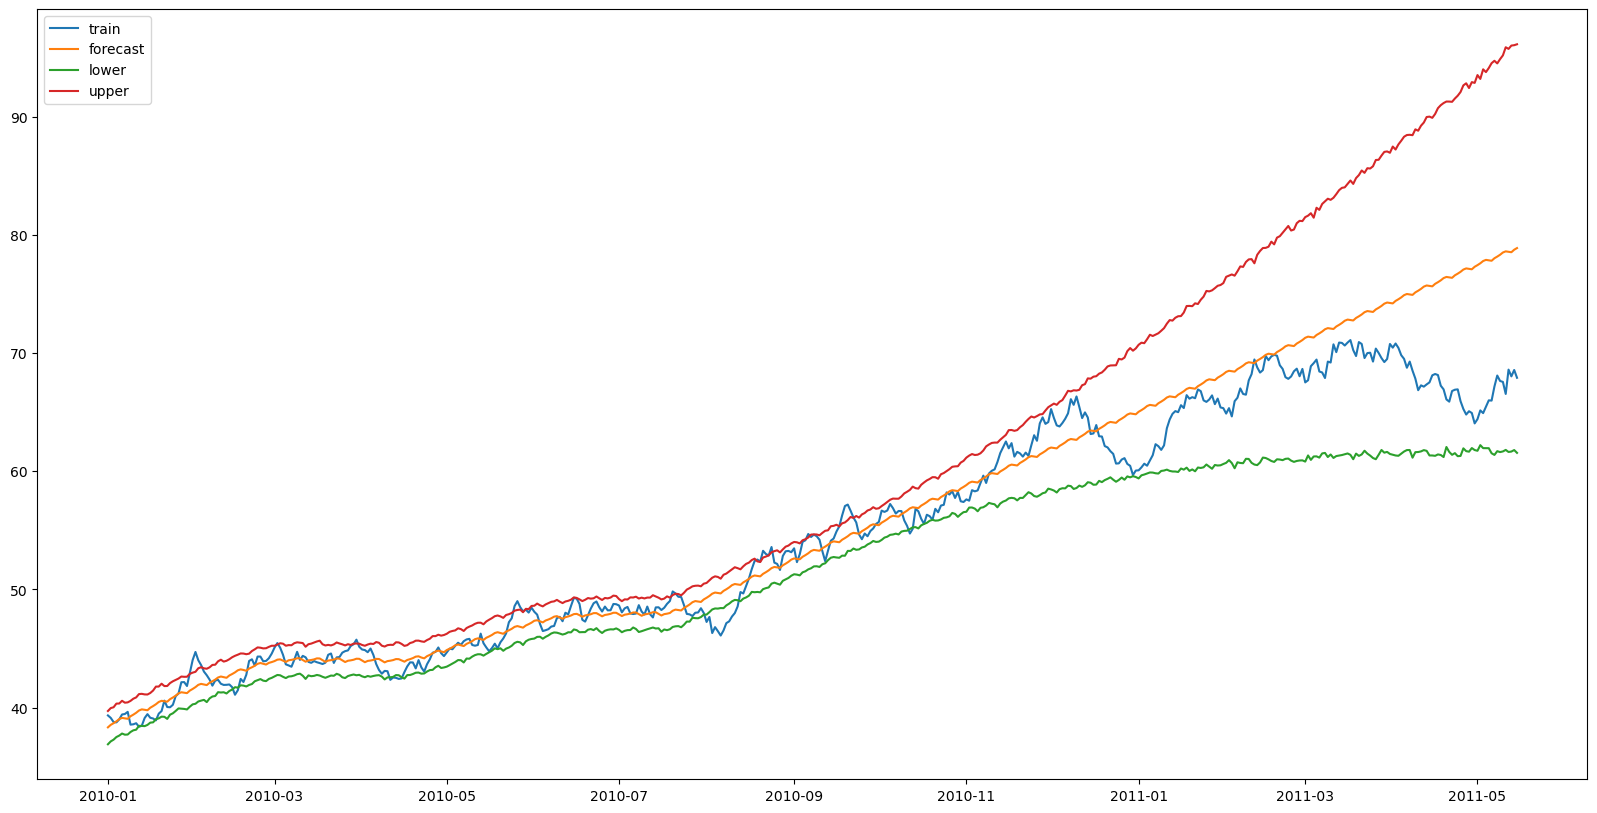

In [12]:
# Performs well on stocks with linear trends, such as 25
# Performs poorly on stocks with trends, such as 1
sample_stock = data[25]

model = Prophet()
start_date = "2010-01-01"
date_range = pd.date_range(start=start_date, periods=500, freq="D")
df_with_date = pd.DataFrame({"ds": date_range, "y": sample_stock})

# Split the data and fit the model
train_df = df_with_date[:250]
model.fit(train_df)
future = model.make_future_dataframe(periods=250)
forecast = model.predict(future)

# Plotting the forecast and actual data
plt.subplots(figsize=(20,10))
plt.plot(df_with_date["ds"], df_with_date["y"], label="train")
plt.plot(forecast["ds"], forecast["yhat"], label="forecast")
plt.plot(forecast["ds"], forecast["yhat_lower"], label="lower")
plt.plot(forecast["ds"], forecast["yhat_upper"], label="upper")
plt.legend()

# Finding laggards and leaders in the data

In [13]:
# Method 1: Cumulative returns
# I don't really understand these, so if you know how to optimize this, please try it and let us know
cumulative_returns = (1 + data_pct).cumprod() - 1 
laggards = cumulative_returns.iloc[-1].sort_values().head(2).index  # Top 2 laggards
leaders = cumulative_returns.iloc[-1].sort_values(ascending=False).head(2).index # Top 2 leaders

In [14]:
laggards, leaders

(Index([0, 48], dtype='int64'), Index([39, 2], dtype='int64'))

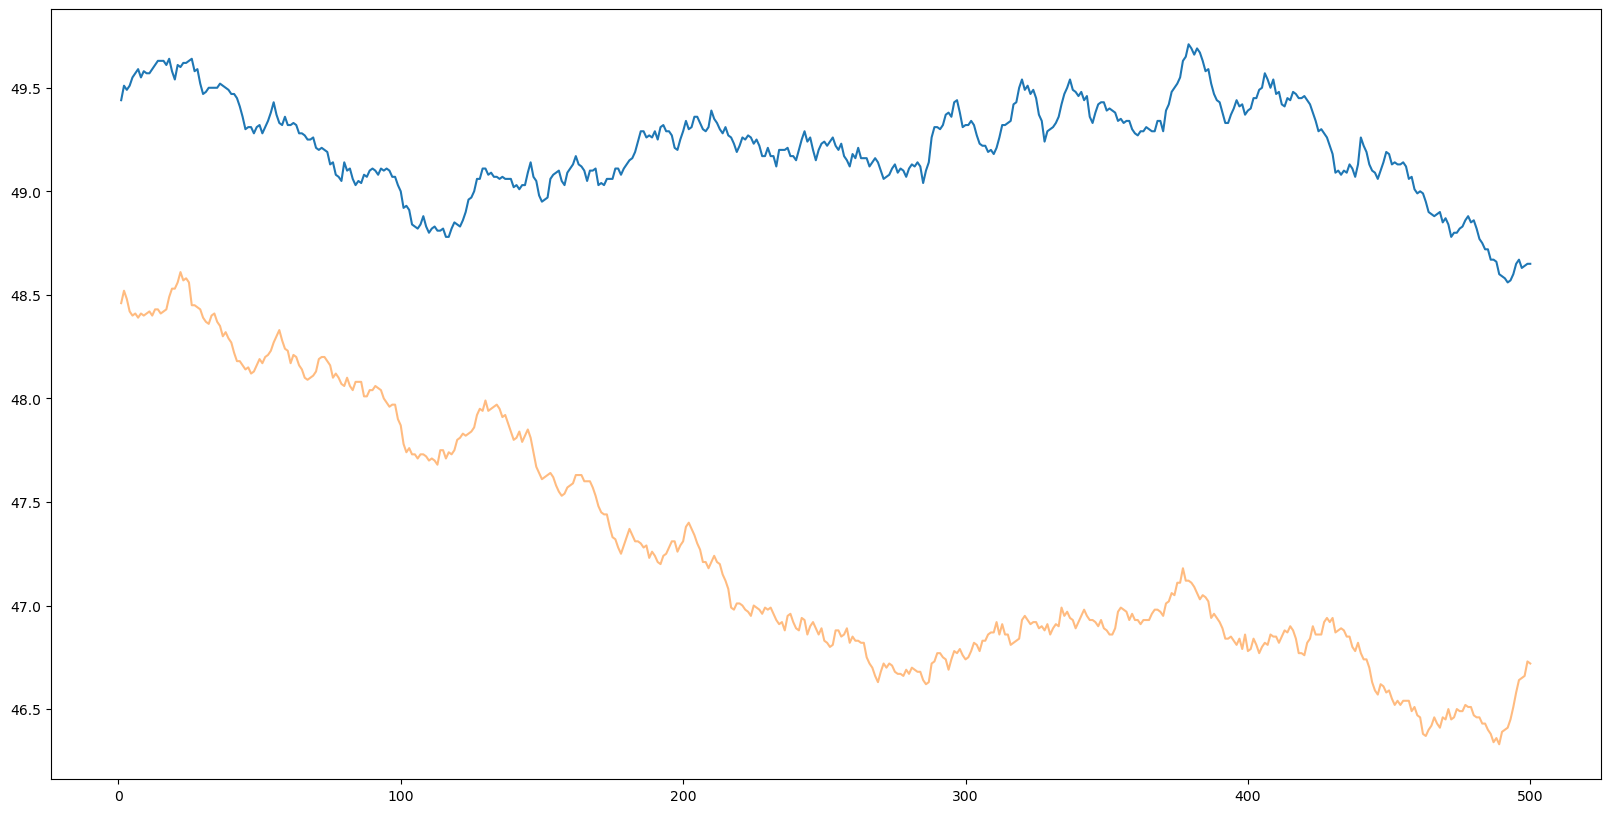

In [15]:
plot_these_stocks(leaders.to_list())
# the same dip around 100 days

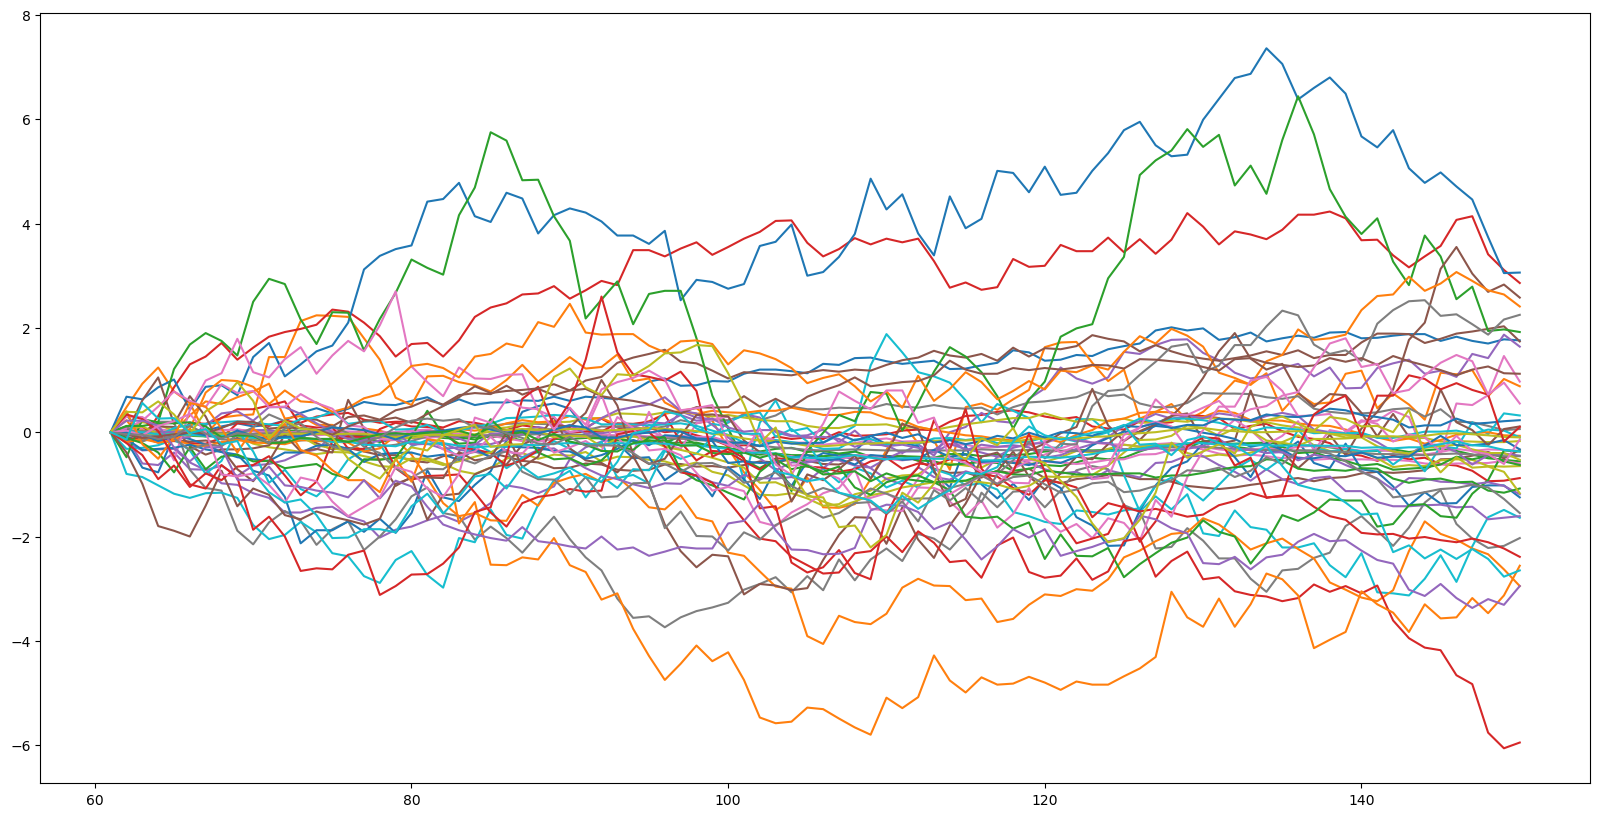

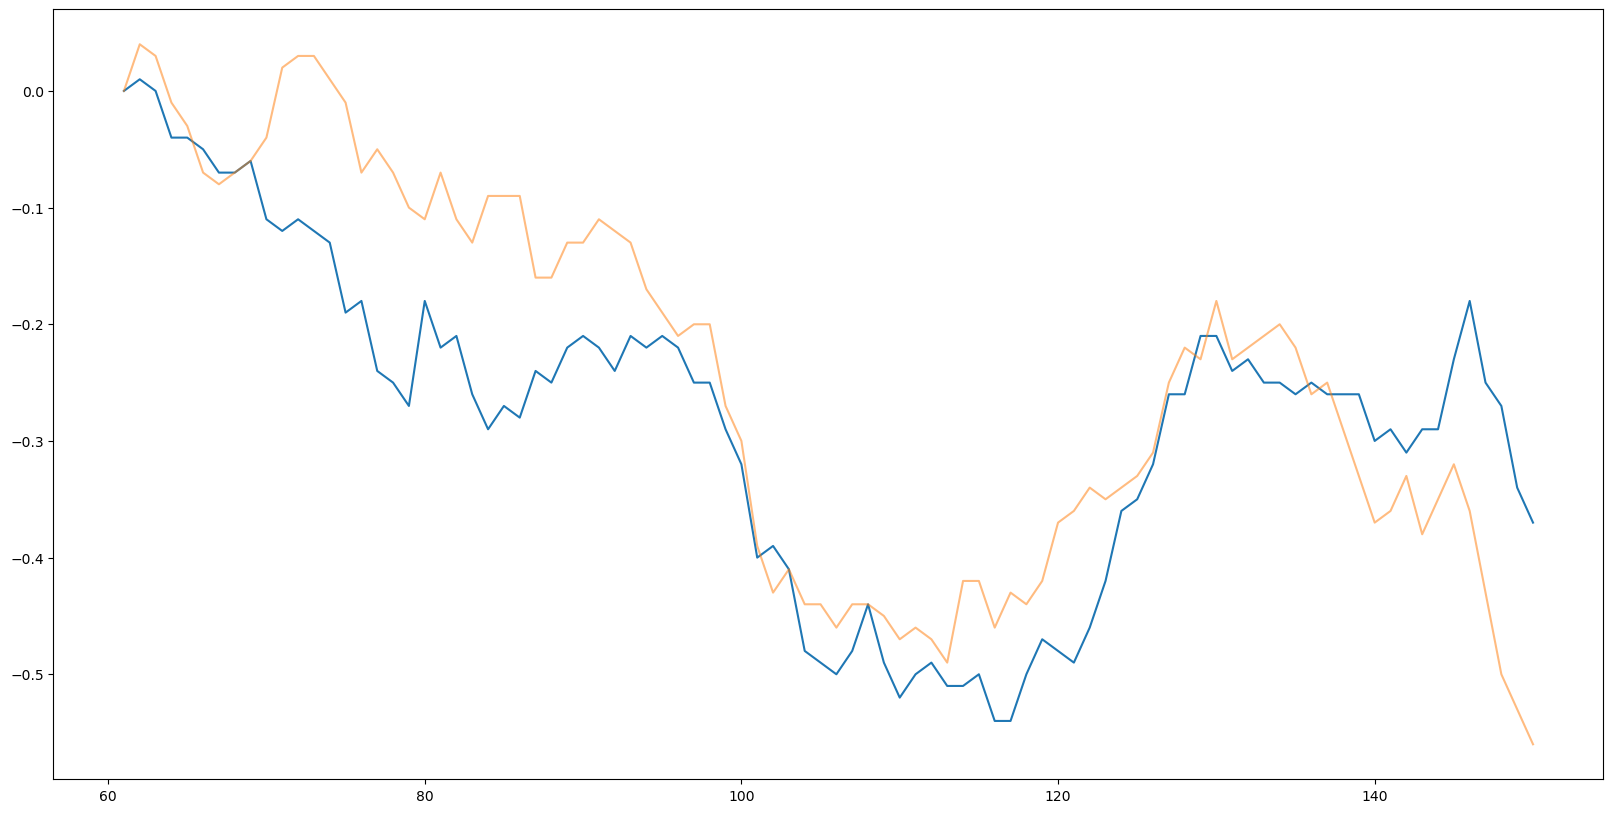

In [16]:
strange_dips = data[60:150].copy()
for i in range(50):
    strange_dips[i] = strange_dips[i] - strange_dips[i][61]

plot_stocks_in_range(0, 50, strange_dips)
plot_these_stocks([39, 2], strange_dips)

Lowest points are: 33   -6.06
41   -5.80
11   -4.06
7    -3.74
44   -3.37
9    -3.13
43   -3.12
25   -3.11
32   -2.78
49   -2.77
dtype: float64


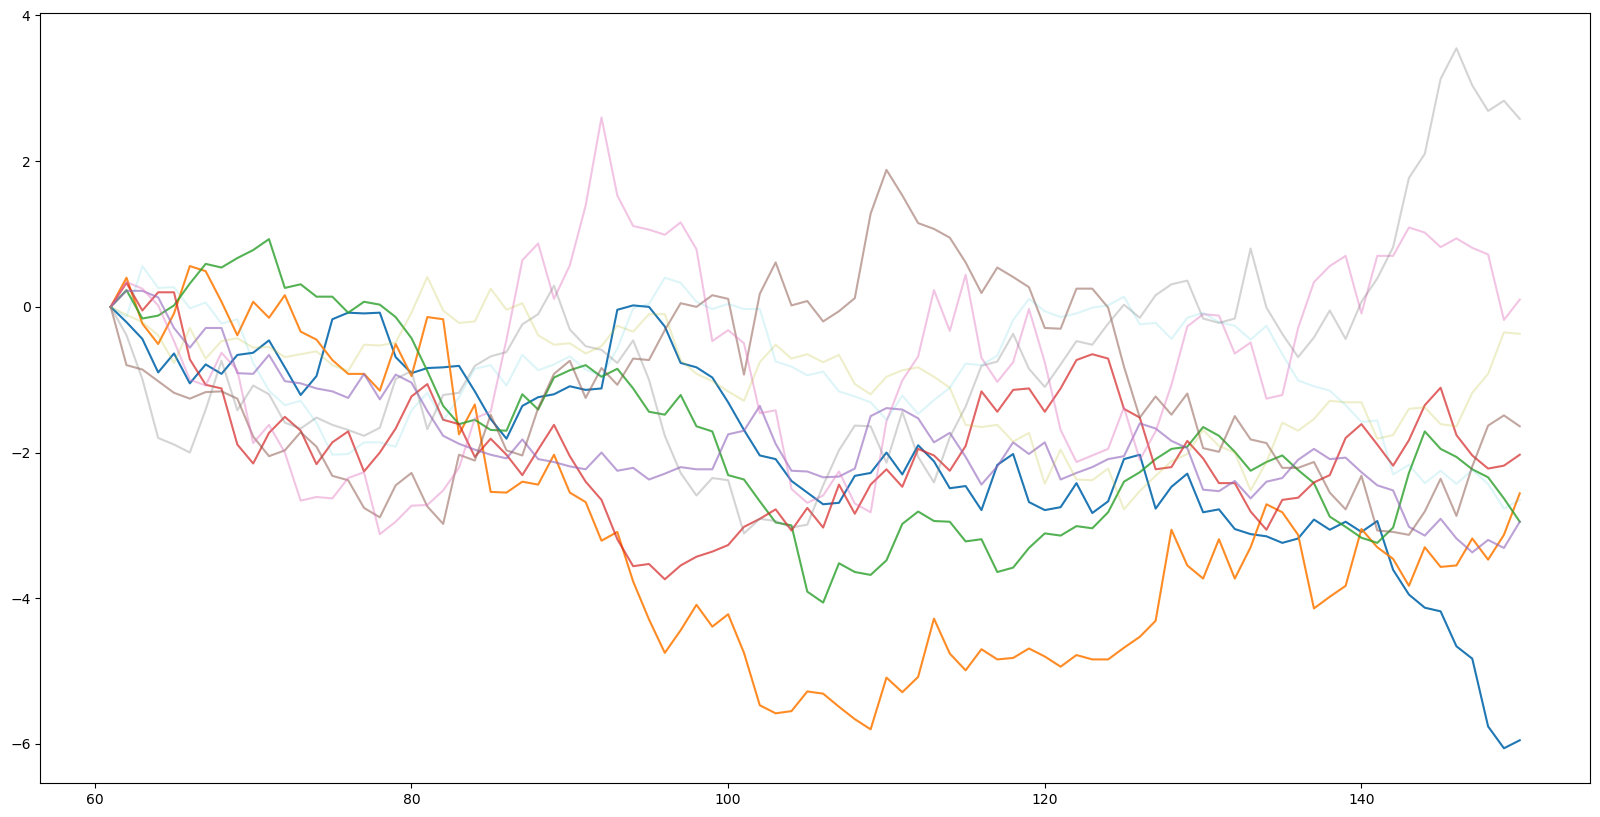

In [17]:
lowest_point = []
for i in range(50):
    lowest_point.append(round(strange_dips[i].min(), 3))
lowest_point = pd.Series(lowest_point)
sd_list = lowest_point.sort_values().head(10).index.to_list()
print("Lowest points are:", lowest_point.sort_values().head(10))
plot_these_stocks(sd_list, strange_dips)

In [18]:
# Method 2: Rolling window
# I don't really understand these, so if you know how to optimize this, please try it and let us know
rolling_corr = data_pct.rolling(window=3).corr(data_pct.iloc[:, 0])
for i in range(2, len(rolling_corr)): # Start from index 2 due to the rolling window
    laggards = rolling_corr.iloc[i].sort_values().head(2).index
    leaders = rolling_corr.iloc[i].sort_values(ascending=False).head(2).index
    print(f"At time {rolling_corr.index[i]}:")
    print(f"  Laggards: {laggards}")
    print(f"  Leaders: {leaders}")

At time 4:
  Laggards: Index([41, 42], dtype='int64')
  Leaders: Index([0, 25], dtype='int64')
At time 5:
  Laggards: Index([29, 31], dtype='int64')
  Leaders: Index([0, 24], dtype='int64')
At time 6:
  Laggards: Index([6, 30], dtype='int64')
  Leaders: Index([0, 24], dtype='int64')
At time 7:
  Laggards: Index([1, 21], dtype='int64')
  Leaders: Index([0, 32], dtype='int64')
At time 8:
  Laggards: Index([1, 46], dtype='int64')
  Leaders: Index([0, 35], dtype='int64')
At time 9:
  Laggards: Index([22, 42], dtype='int64')
  Leaders: Index([0, 11], dtype='int64')
At time 10:
  Laggards: Index([9, 5], dtype='int64')
  Leaders: Index([0, 41], dtype='int64')
At time 11:
  Laggards: Index([7, 11], dtype='int64')
  Leaders: Index([0, 35], dtype='int64')
At time 12:
  Laggards: Index([15, 1], dtype='int64')
  Leaders: Index([0, 34], dtype='int64')
At time 13:
  Laggards: Index([19, 46], dtype='int64')
  Leaders: Index([0, 36], dtype='int64')
At time 14:
  Laggards: Index([25, 41], dtype='int64'

# Testing ARIMA

In [21]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from sklearn.metrics import mean_squared_error

# ARIMA model
train = data[:250]
test = data[250:]
predictions = pd.DataFrame()

p, d, q = 5, 1, 0
for i in range(50):
    history = train[i].values
    model = ARIMA(history, order=(p, d, q))
    model_fit = model.fit()
    output = model_fit.forecast(steps=250)
    predictions[i] = output

ModuleNotFoundError: No module named 'pmdarima'

In [109]:
predictions

0          1          2          3          4          5   \
0    14.816919  67.587552  46.818193  47.705878  56.877329  11.851412   
1    14.827204  67.602533  46.818803  47.702862  56.903352  11.847855   
2    14.829727  67.605168  46.810635  47.697546  56.931109  11.850557   
3    14.828819  67.606114  46.811975  47.686885  56.942228  11.843314   
4    14.827881  67.605107  46.810641  47.681340  56.945241  11.845417   
..         ...        ...        ...        ...        ...        ...   
245  14.827237  67.604606  46.808764  47.673561  56.952044  11.843151   
246  14.827237  67.604606  46.808764  47.673561  56.952044  11.843151   
247  14.827237  67.604606  46.808764  47.673561  56.952044  11.843151   
248  14.827237  67.604606  46.808764  47.673561  56.952044  11.843151   
249  14.827237  67.604606  46.808764  47.673561  56.952044  11.843151   

            6          7          8          9   ...         40         41  \
0    18.196810  46.503778  67.901244  49.007760  ...  31.388273  67.429271   
1    18.197013  46.504993  67.902291  48.969317  ...  31.391262  67.392521   
2    18.198010  46.519896  67.907250  49.006861  ...  31.398473  67.397441   
3    18.195733  46.521711  67.922062  49.050927  ...  31.399218  67.401161   
4    18.196663  46.520849  67.940325  49.003674  ...  31.398627  67.392191   
..         ...        ...        ...        ...  ...        ...        ...   
245  18.196693  46.520018  67.955194  48.996155  ...  31.399097  67.392522   
246  18.196693  46.520018  67.955194  48.996155  ...  31.399097  67.392522   
247  18.196693  46.520018  67.955194  48.996155  ...  31.399097  67.392522   
248  18.196693  46.520018  67.955194  48.996155  ...  31.399097  67.392522   
249  18.196693  46.520018  67.955194  48.996155  ...  31.399097  67.392522   

            42         43         44         45         46         47  \
0    12.222851  58.137828  36.022757  52.557999  53.436112  33.234812   
1    12.221111  58.066935  35.997276  52.602897  53.415464  33.208058   
2    12.213470  58.081771  35.978942  52.614894  53.436797  33.217960   
3    12.217774  58.052892  36.004639  52.593191  53.438109  33.221771   
4    12.219746  58.077918  36.034432  52.580144  53.454683  33.208620   
..         ...        ...        ...        ...        ...        ...   
245  12.218897  58.061944  36.035166  52.590464  53.451817  33.210793   
246  12.218897  58.061944  36.035166  52.590464  53.451817  33.210793   
247  12.218897  58.061944  36.035166  52.590464  53.451817  33.210793   
248  12.218897  58.061944  36.035166  52.590464  53.451817  33.210793   
249  12.218897  58.061944  36.035166  52.590464  53.451817  33.210793   

            48         49  
0    42.703251  54.423131  
1    42.763586  54.456130  
2    42.705260  54.483261  
3    42.716299  54.525537  
4    42.670657  54.546754  
..         ...        ...  
245  42.657902  54.581160  
246  42.657902  54.581160  
247  42.657902  54.581160  
248  42.657902  54.581160  
249  42.657902  54.581160  

[250 rows x 50 columns]

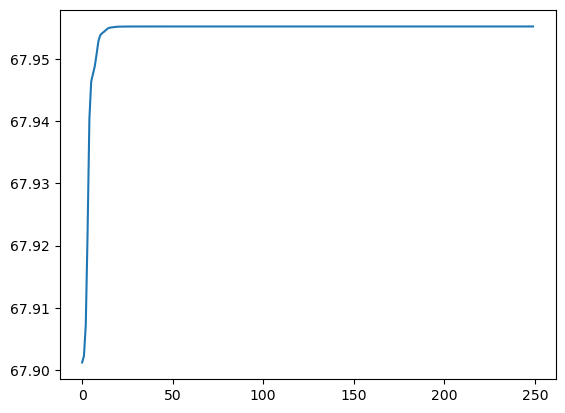

In [113]:
stock = 8
plt.plot(predictions[stock])
# plt.legend(["train", "test", "forecast"])
plt.show()